In [61]:
import qutip as q
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from sympy import *
import math
from qutip import tensor

In [55]:
p = Symbol('p')
psi = Symbol('psi')
i = Symbol('i')
e = Symbol('e')
up = Symbol('up')
down = Symbol('down')
#upupket = Qobj([[1],[0],[0],[0]])
#downdownket = Qobj([[0],[0],[0],[1]])
#upupbra = Qobj([[1,0,0,0]])
#downdownbra = Qobj([[0,0,0,1]])
Aup = basis(2,0)
Adown = basis(2,1)
Bup = basis(2,0)
Bdown = basis(2,1)

In [56]:
qstate = tensor(Aup,Bup) + tensor(Adown,Bdown)
print(qstate)
densop = qstate*qstate.dag()
print(densop)
densopa = ptrace(densop, [1])
print(densopa)

Quantum object: dims=[[2, 2], [1, 1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [1.]]
Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [1. 0. 0. 1.]]
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0.]
 [0. 1.]]


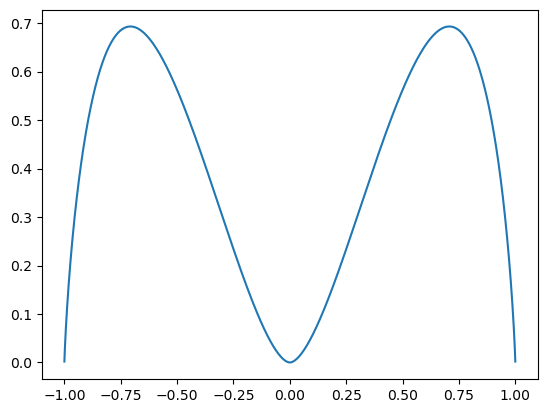

In [57]:
p = np.linspace(-0.9999, 0.9999, 10000)
s = ((p**2)-1)*np.log(1-(p**2)) - (p**2)*np.log(p**2)
plt.plot(p, s)
plt.show()

for psi = 0


C:\Users\danny\AppData\Local\Temp\ipykernel_18012\1600246682.py:18: RuntimeWarning: divide by zero encountered in log
  vnentropylist.append(-l*np.log(l))
C:\Users\danny\AppData\Local\Temp\ipykernel_18012\1600246682.py:18: RuntimeWarning: invalid value encountered in scalar multiply
  vnentropylist.append(-l*np.log(l))


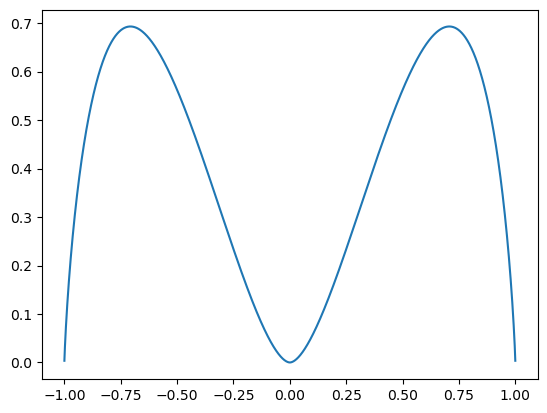

for psi = 1.5707963267948966


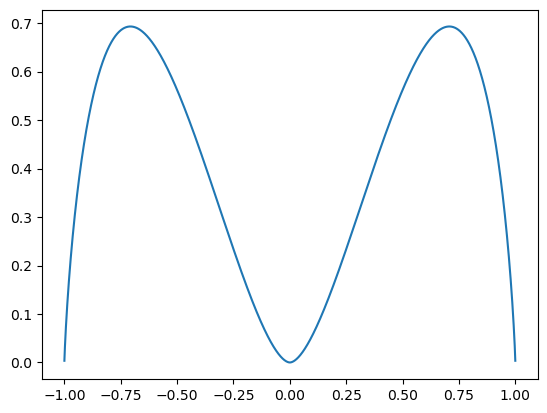

for psi = 3.141592653589793


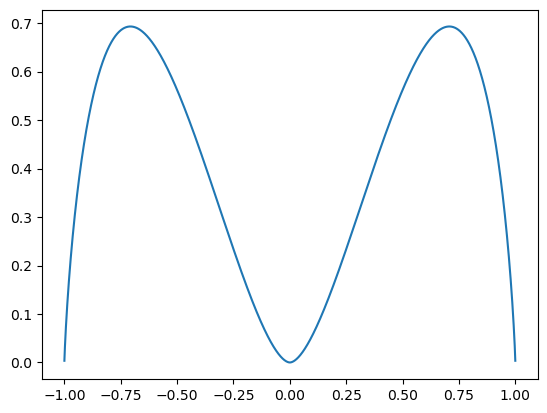

for psi = 4.71238898038469


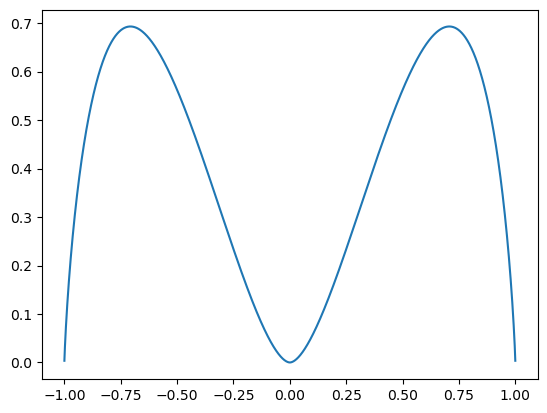

for psi = 6.283185307179586


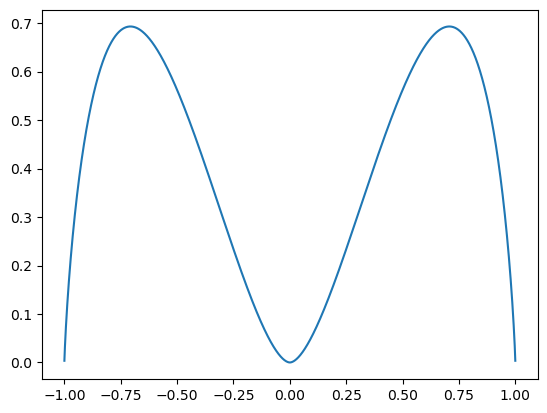

In [81]:
psi = [0, (math.pi)/2, math.pi, (3*math.pi)/2, 2*math.pi]
for i in psi:
    print("for psi = " + str(i))
    points=[]
    o = np.linspace(-1, 1, 10000)
    for p in o:
        #print("for p = " + str(p))
        qstate = np.sqrt(1-p**2)*tensor(Aup,Bup) + ((p)*math.e**(1j*i))*tensor(Adown,Bdown)
        #print(qstate)
        densop = qstate*qstate.dag()
        #print(densop)
        densopa = ptrace(densop, [1])
        #print(densopa)
        eigenvalues = densopa.eigenenergies(densopa)
        vnentropylist = []
        for l in eigenvalues:
            vnentropylist.append(-l*np.log(l))
        vnentropy = sum(vnentropylist)
        points.append(vnentropy)
        #print(vnentropy)
    plt.plot(o, points)
    plt.show()
    